In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
from scipy.stats import laplace
from scipy.stats import norm

Для анализа возьмем непрерывное распределение Лапласа

In [168]:
lapl = sts.laplace()

Сгенерируем выборку объема 1000

In [169]:
data = lapl.rvs(1000)

Построим гистограмму выборки и поверх неё нанесем теоретическую плотность распределения Лапласа

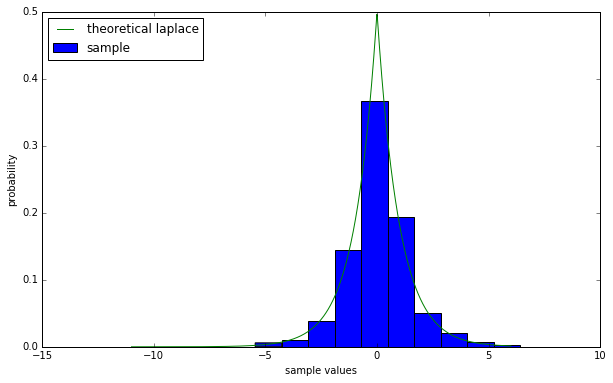

In [170]:
fig, ax = plt.subplots(1, 1,  figsize=(10, 6))
plt.hist(data, normed = True, label = 'sample')
x = np.linspace(-11, 6, 1000)
ax.plot(x, lapl.pdf(x), label='theoretical laplace')
ax.legend(loc = 'upper left')
ax.set_xlabel('sample values')
ax.set_ylabel('probability')

Сгенерируем 1000 выборок для каждого объема n: 5, 10 и 50

In [171]:
samples_n5 = []
samples_n10 = []
samples_n50 = []

for i in range(1000):
    samples_n5.append(lapl.rvs(5))
    samples_n10.append(lapl.rvs(10))
    samples_n50.append(lapl.rvs(50))

Найдем выборочное среднее

In [172]:
sample_means_n5 = []
sample_means_n10 = []
sample_means_n50 = []

for elem in samples_n5:
    sample_means_n5.append(np.mean(elem))

for elem in samples_n10:
    sample_means_n10.append(np.mean(elem))

for elem in samples_n50:
    sample_means_n50.append(np.mean(elem))   

Построим гистограммы средних

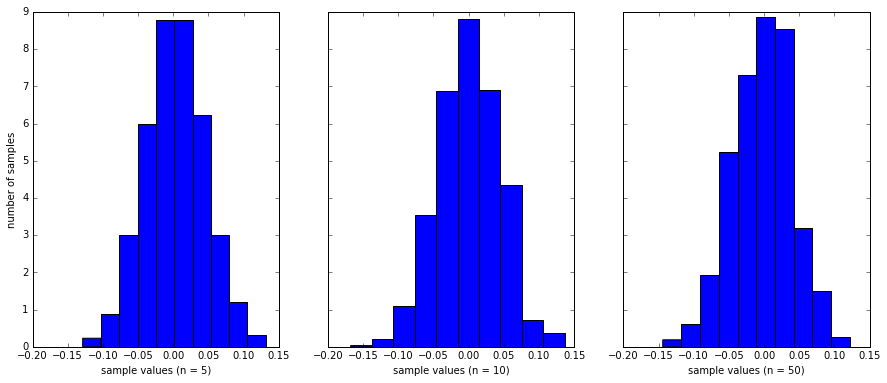

In [173]:
fig, axis = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(15, 6))
axis[0].hist(sample_means[:1000], normed = True)
axis[1].hist(sample_means[1001:2001], normed = True)
axis[2].hist(sample_means[2000:3001], normed = True)
axis[0].set_ylabel('number of samples')
axis[0].set_xlabel('sample values (n = 5)')
axis[1].set_xlabel('sample values (n = 10)')
axis[2].set_xlabel('sample values (n = 50)')

Зная формулы для среднего и дисперсии распределения Лапласа, зададим нормальное распределение

In [174]:
norm_dist_5 = sts.norm(scale = [np.sqrt(var.item()/5)], loc = mean.item())
norm_dist_10 = sts.norm(scale = [np.sqrt(var.item()/10)], loc = mean.item())
norm_dist_50 = sts.norm(scale = [np.sqrt(var.item()/50)], loc = mean.item())

Теперь поверх каждой гистограммы средних зададим плотность соответствующего нормального распределения

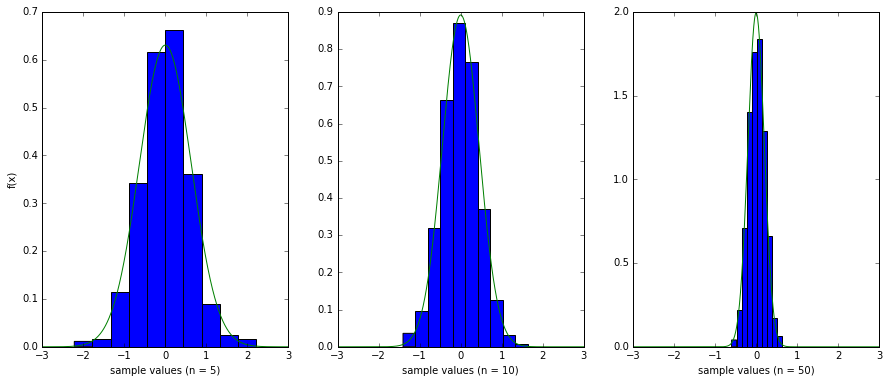

In [175]:
fig5, axis5 = plt.subplots(1, 3, figsize=(15, 6))
x5 = np.linspace(-3, 3, 1000)
axis5[0].hist(sample_means_n5, normed = True)
axis5[1].hist(sample_means_n10, normed = True)
axis5[2].hist(sample_means_n50, normed = True)
axis5[0].plot(x5, norm_dist_5.pdf(x5), label = '')
axis5[1].plot(x5, norm_dist_10.pdf(x5))
axis5[2].plot(x5, norm_dist_50.pdf(x5))
axis5[0].set_ylabel('f(x)')
axis5[0].set_xlabel('sample values (n = 5)')
axis5[1].set_xlabel('sample values (n = 10)')
axis5[2].set_xlabel('sample values (n = 50)')

Нам удалось на практике доказать центральную предельную теорему, а именно тот факт, что с ростом числа объектов в выборке распределение выборочных средних все более стремится к нормальному. Это можно видеть по все более точной аппроксимации графика f(x) к очертаниям гистограммы с нормальным ростом n.